<div class="alert alert-info">

### This is a Jupyter notebook

You can learn all about the Jupyter interface [here](https://realpython.com/jupyter-notebook-introduction/)

Some basics: 
Jupyter has two modes: command and edit. When you click a cell, you enter ```edit mode``` and you can edit its contents. To exit ```edit mode```, you press ```ESC```.

* Cells can be either code cells or text (or markdown) cells
* To run cells, press Shift+enter 
* To turn a cell into a text cell, press `m` (markdown) in command mode
* To create a new cell use `b` (new cell below) or `a` (above) in command mode

</div>

In [112]:
options(repr.plot.width=5, repr.plot.height=5)

# Introduction to Hypothesis Testing


In exoerimental settings you are usually comparing two groups (controls and the others). The basic idea in statistical hypothesis testing is to assess the probability that there is no difference between the two groups. Essentialy you are applying [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) (*Numquam ponenda est pluritas sine necessitate*), which essentially states that the simplest explanation is probably the best.  Like Karl Popper said: *Science advances by rejection*. 

Once you state you null hypothesis, (and the alternative hypothesis), you can then calculate what is the probability that your data came from the null hypothesis, **given that the null hypothesis is true**. 

<div class="alert alert-info">

This is your *p-value*. It is simply the probability of the data, under the null hypothesis. If this probability is low, you have sufficient statistical evidence to reject the null hypothesis. Otherwise, you fail to reject the null hypothesis.

</div>

One thing to remember is that your test is only as good as your null hypothesis. **If your null hypothesis cannot be true, you chose it wrong**, so you have to choose a sensible one, that has a chance of being true.

You will notice that I was vague about how low the p-value needs to be. This is because this is a subjective choice. A common choice is 5% (significante level of 95% - $1-p_{crit}$), but that is simply convention. At 5% you accept that  1 in 20 times you **will wrongly reject the null hypothesis**. This is the so-called *type I error*. More on that later! 


Lets go through an example. Imagine that a researcher wants to study a hybrid mouse in which one of the copies of a gene (*pem*) is replaced by a non-functional protein (*gfp*). However, when the hybrids were crossed, no homozygous *pem* genotypes appeared. Is *pem* a recessive embryonic lethal gene?

So, in this case our null hypothesis $H_0$ is that the number of homozygous *pem* comes from a binomial distribution with probability $p=1/4$. The alternative is that the probability of homozygous *pem* is **less** than $1/4$.

$$
H_0: p=\frac{1}{4}\\
H_1: p<\frac{1}{4}
$$

How do we test? We simply calculate how likely is it to get a 0 successes (homozygous *pem*) under a binomial distribution with $p=1/4$ and $n$ equal to the size of the litter. In other words, this binomial is oour null distribution and the test statistic is the probability of a 0 ($P_0$)

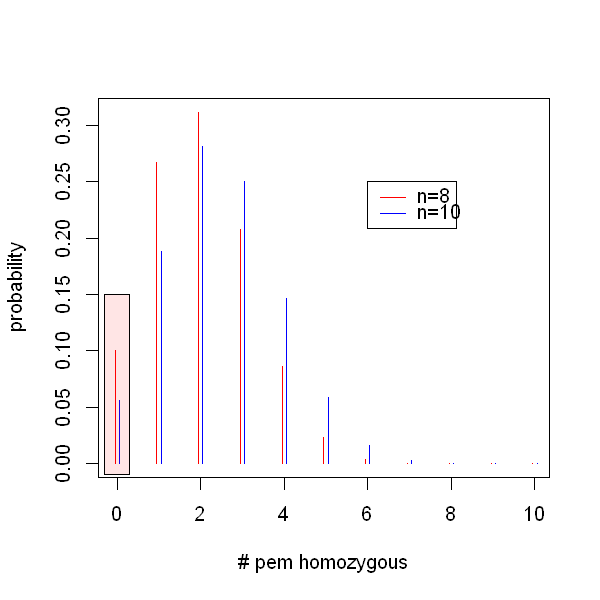

In [113]:
xx = 0:10
plot(xx-.05,dbinom(xx,size = 8,prob=.25),type='h',col='red',xlab='# pem homozygous',ylab='probability')
points(xx+.05,dbinom(xx,size = 10,prob=.25),type='h',col='blue')

legend(6,.25,legend = c("n=8","n=10"),lty=1,col=c('red','blue'))

rect(-.3, -.01, .3, .15, col = rgb(1,0,0,.1), border = , lty = par("lty"), lwd = par("lwd"))

So, obviously for a litter size of 10 (I am assuming here), it is hard to reject the null hypothesis that the *pem* homozygous just didn't happen, but it is still inherited in a mendelian way. More formally we could perform the binomial test, which is essentially the same thing.

In [75]:
binom.test(0,10,p = .25,alternative = 'less')


	Exact binomial test

data:  0 and 10
number of successes = 0, number of trials = 10, p-value = 0.05631
alternative hypothesis: true probability of success is less than 0.25
95 percent confidence interval:
 0.0000000 0.2588656
sample estimates:
probability of success 
                     0 


This was assuming a single litter. What if you had several litters? Can you think about it? What if the several litters had different sizes?

# Type I and type II errors - Calculating the power of the test

We already know that a **type I** error is when you falsely reject the null hypothesis, thereby accepting the alternative hypothesis (also called a **false positive**). The flipside of this is when you falsely accept the null-hypothesis when it is in reality not true (I am abusing the language here). This is called a **type II** error, that is, when you reject the alternative hypothesis when it is in reality true (a **false negative**).

<div class="alert alert-info">

**Why is this important?** Because, most times, you want to not just reject the null hypothesis but also to detect the effect you are looking for. 

</div>

If you were just interested in rejecting the null hypothesis, you could lower your significance level (your critical *p-value*) to nearly zero and you would nearly always reject it. However, in that case, the minimal effect (on the alternative hypothesis) you could reliably detect would be huge, and you would never see it.


Let's look at an example:

Imagine you are planning a experiment where you have two groups: control and treatment. You would like to know if the treatment had any effect, but you would like to know what is the minimum difference that you can detect. Obviously, the best way to detect a difference in means of the two groups is to perform a `t-test` (You remember the `t` distribution from the Confidence interval lecture, right?).

We can calculate this by simulation (we could do it using analytical methods, but this is more instructive). The way we do this is to sample from the two normal distributions, assuming that one of them has a slightly different mean. Because the difference of two normals is still a normal, the ratio of the mean and standard deviation of this sample will follow a `t` distribution. so we can use that to test our hypothesis, and to check how often the null hypothesis is reject when there is in fact a difference between the two distributions.

**So lets do it**


In [119]:
sample_size =100

x = rnorm(sample_size) # a random sample (n=100) from a normal distribution with mean 0 and std deviatio 1
y = rnorm(sample_size,1) # another random sample of the smae size but with a difference in the mean
tval=t.test(x,y)

In [120]:
attributes(tval)

$names
 [1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"  

$class
[1] "htest"

In [121]:
tval$p.value


[1] 1.791113e-11

## Calculating the power of a test

In [123]:
means = seq(-.5,.5,.01) # the range of means you want to test
reps=1000 # repetitions
sample_size=100 # sample size


counts_vector=vector()

for(m in means){ # for each difference in mean
    counts = 0
    for(n in 1:reps) # count how often we reject the null hypothesis
    {    
        x = rnorm(sample_size,mean = m)
        y = rnorm(sample_size)
        tval=t.test(x,y)
        pval = tval$p.value
        if (pval<=.05){  # if p<.05, reject and add to the counter
            counts=counts+1
        }
    }    
    counts_vector = c(counts_vector,counts/reps)
}

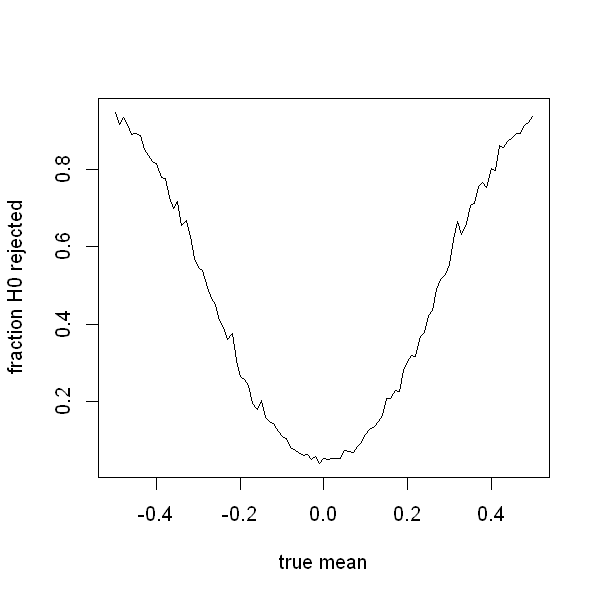

In [124]:
plot(means,counts_vector,xlab="true mean",ylab="fraction H0 rejected",type="l")
# abline(h=.6)

In [125]:
means[which(means[(counts_vector>.5)]>0)][1]

[1] -0.28

As you can see, for a difference in means of about 0.3, we are accepting the null hypothesis more than 50% of the times, when in fact it should be rejected (because we know there is a difference in means).

<div class="alert alert-info">
     
This is the **power** of the test: *How often you reject the null hypothesis when it is in fact false*.
     
</div>

The **power** depends on both the sample size and the significance you chose. Let's see how this curve looks at a significance level of $\alpha = 1\%$

In [126]:
means = seq(-.5,.5,.01) # the range of means you want to test
reps=1000 # repetitions
sample_size=100 # sample size


counts_vector_5=vector()
counts_vector_1=vector()

for(m in means){ # for each difference in mean
    counts5 = 0
    counts1 = 0
    for(n in 1:reps) # count how often we reject the null hypothesis
    {    
        x = rnorm(sample_size)
        y = rnorm(sample_size,mean=m)
        tval=t.test(x,y)
        pval = tval$p.value
        if (pval<=.05){  # if p<.05, reject and add to the counter
            counts5=counts5+1
        }
        if (pval<=.01){  # if p<.05, reject and add to the counter
            counts1=counts1+1
        }

    }    
    counts_vector_5 = c(counts_vector_5,counts5/reps)
    counts_vector_1 = c(counts_vector_1,counts1/reps)

}

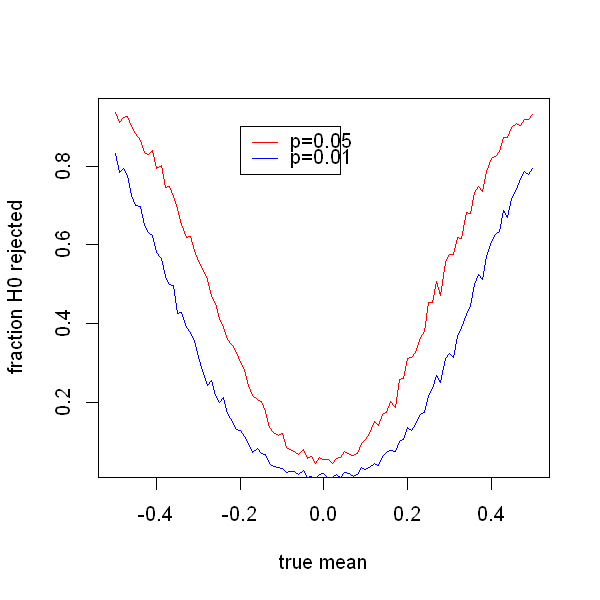

In [127]:
plot(means,counts_vector_5,xlab="true mean",ylab="fraction H0 rejected",type="l",col='red')
lines(means,counts_vector_1,type="l",col='blue')
legend(-.2,.9,legend = c("p=0.05","p=0.01"),col = c("red","blue"),lty=1)

In [128]:
means[which(means[(counts_vector_1>.5)]>0)][1]

[1] -0.37

As you can see, by lowering the critical p-value, we (by construction) commit less type I errors (reject the null hypothesis, when it is true), but we also accept the null hypothesis more when it is in fact false (when there **is** a difference), meaning the minimum difference we can detect now is higher.

## Determining sample sizes 

You can use this strategy to calculate sample sizes for a particular significance level and power.

For example, what is the sample size we would need to have a significance level of 5% and a power of at least 90% a difference of at least .1? For this, we basically

In [135]:
sample_sizes=seq(1000,3000,100) # sample sizes
reps=1000 # repetitions

counts_vector=vector()

for(sample_size in sample_sizes){ # for sample size
    counts = 0
    for(n in 1:reps) # count how often we reject the null hypothesis
    {    
        x = rnorm(sample_size,mean = .1)
        y = rnorm(sample_size)
        tval=t.test(x,y)
        pval = tval$p.value
        if (pval<=.05){  # if p<.05, reject and add to the counter
            counts=counts+1
        }
    }    
    counts_vector = c(counts_vector,counts/reps)
}

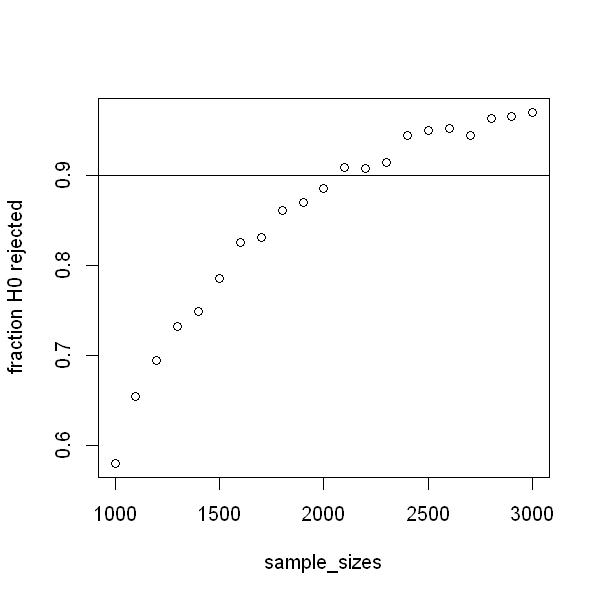

In [137]:
plot(sample_sizes,counts_vector,ylab="fraction H0 rejected")
abline(h=.9)

So for this task, it seems that a sample size of about 2000 would allow you to detect a difference in means of $\Delta m =0.1 $ 90% of the times.